In [112]:
# Dependencies
import numpy as np
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [113]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [114]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [115]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
results = session.query(Measurement.date, Measurement.tobs).\
filter(func.strftime("%m", Measurement.date) == "06").\
    order_by(Measurement.date.desc()).all()

In [116]:
#  3. Convert the June temperatures to a list.
june_temps = list(results)

In [117]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temps_df = pd.DataFrame(june_temps, columns=['Date', 'June Temps'])
june_temps_df

,Date,June Temps
0,2017-06-30,75.0
1,2017-06-30,74.0
2,2017-06-30,81.0
3,2017-06-30,74.0
4,2017-06-30,75.0
...,...,...
1695,2010-06-01,69.0
1696,2010-06-01,76.0
1697,2010-06-01,71.0
1698,2010-06-01,74.0


In [118]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temps_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


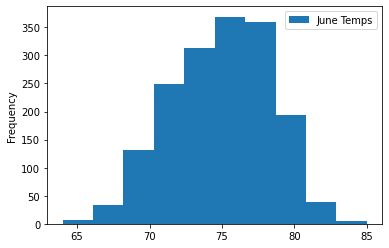

In [150]:
june_temps_df.plot.hist()
plt.savefig("Resources/june_temps.png", facecolor="w")

## D2: Determine the Summary Statistics for December

In [97]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_results = session.query(Measurement.date, Measurement.tobs).\
filter(func.strftime("%m", Measurement.date) == "12").\
    order_by(Measurement.date.desc()).all()

In [98]:
# 7. Convert the December temperatures to a list.
dec_temps = list(dec_results)

In [99]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temps_df = pd.DataFrame(dec_temps, columns=['Date', 'December Temps'])

In [100]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_temps_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


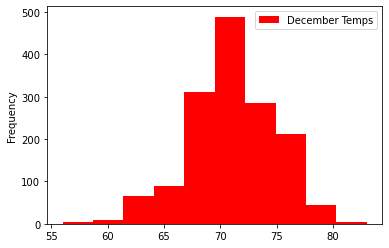

In [140]:
dec_temps_df.plot.hist(color="r")
plt.savefig("Resources/dec_temps.png", facecolor="w")

## D3: Determine the Summary Statistics of Precipitation for June and December

In [159]:
#Pulling the precipitation for june and december with refacotred code. 
dec_prcp_results = session.query(Measurement.date, Measurement.prcp).\
filter(func.strftime("%m", Measurement.date) == "12").\
    order_by(Measurement.date.desc()).all()
dec_prcp = list(dec_prcp_results)
dec_prcp_df = pd.DataFrame(dec_prcp, columns=["Date", "Precipitation (inces)"])


june_prcp_results = session.query(Measurement.date, Measurement.prcp).\
filter(func.strftime("%m", Measurement.date) == "06").\
    order_by(Measurement.date.desc()).all()
june_prcp = list(june_prcp_results)
june_prcp_df = pd.DataFrame(june_prcp, columns=["Date", "Precipitation (inces)"])

In [160]:
dec_prcp_df.describe()

,Precipitation (inces)
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


In [161]:
june_prcp_df.describe()

,Precipitation (inces)
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


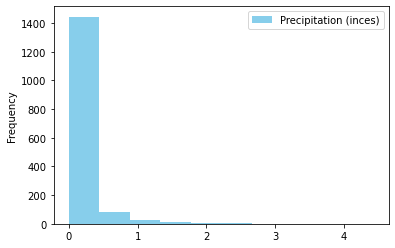

In [163]:
june_prcp_df.plot.hist(color="skyblue")
plt.savefig("Resources/june_prcp.png", facecolor="w")

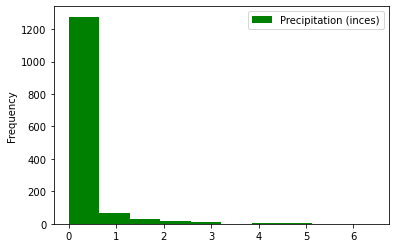

In [164]:
dec_prcp_df.plot.hist(color="g")
plt.savefig("Resources/dec_prcp.png", facecolor="w")